In [1]:
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
train_df = pd.read_excel("data/train.xlsx")
test1_df = pd.read_excel("data/testA.xlsx")
test2_df = pd.read_excel("data/testB.xlsx")

In [3]:
train_y = train_df[train_df.columns[-1]]
train_y.shape
new_column = test1_df.columns
train_df = train_df[new_column]
train_id = train_df['ID']
test1_id = test1_df['ID']
test2_id = test2_df['ID']
train_df.drop(['ID'], axis=1, inplace=True)
test1_df.drop(['ID'], axis=1, inplace=True)
test2_df.drop(['ID'], axis=1, inplace=True)

In [4]:
train_df = train_df[train_y>1.8]
train_df.shape

(799, 5952)

In [5]:
train_y = train_y[train_y>1.8]
train_y.shape

(799,)

In [6]:
# get int and time part first
ints = []
year = []
names = train_df.columns
dts = train_df.dtypes
for i in range(len(names)):
    if 'int' in str(dts[i]) or 'object' in str(dts[i]):
        ints.append(names[i])
print(len(ints))

for n in ints:
    if str(train_df[n][0])[:4] == '2017' and str(test1_df[n][0])[:4] == '2017':
        year.append(n)
print(len(year))

770
45


In [7]:
# whether these has nulls
df_X = pd.concat([train_df, test1_df, test2_df], axis=0)
print(df_X.shape)
print(np.sum(df_X[year].isnull().values))
print(np.sum(df_X[ints].isnull().values))

(1511, 5952)
621
32239


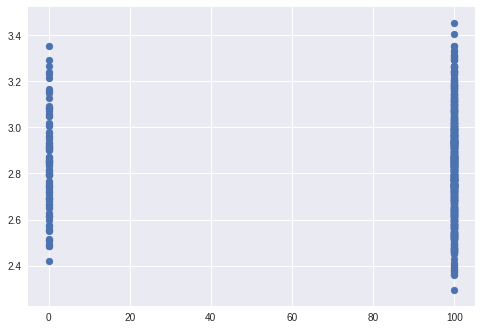

(0, 89)
(100, 710)


(0.34941005010761783, 0.19796334905490443)

In [56]:

c = df_X['210X218'][:799]
plt.scatter(c[c.notnull()], train_y[c.notnull()])
plt.show()
InformationEntropyAndEntropy(c.values, True)

In [27]:
ints[22]

'210X207'

In [57]:
def InformationEntropyAndEntropy(col):
    freqs = {}
    cl = len(col)
    for i in range(cl):
        v = col[i]
        if v not in freqs:
            freqs[v] = 0
        freqs[v] += 1
    freqs = sorted(freqs.items(), key=lambda x:x[1])
    e = 0
    g = 1
    for f in freqs:
        e += f[1]/cl*np.log(f[1]/cl)
        g -= np.square(f[1]/cl)
    return -e, g

In [60]:
drop_names = []
for i in ints:
    tri = df_X[i][:799]
    x1 = np.sum(tri.isnull())
    tei = df_X[i][799:1099]
    x2 = np.sum(tei.isnull())
    tei2 = df_X[i][1099:]
    x3 = np.sum(tei2.isnull())
    if (len(set(tri)) == 1) or (len(set(tei)) == 1) or (len(set(tei2)) == 1):
        drop_names.append(i)
    elif x1/799 > 0.4 or x2/300>0.4 or x3/412>0.4:
        drop_names.append(i)
    else:
        c = df_X[i]
        r = c[c.notnull()]
        ies, igs = InformationEntropyAndEntropy(r.values)
        tri = tri[tri.notnull()]
        ie1, ig1 = InformationEntropyAndEntropy(tri.values)
        tei = tei[tei.notnull()]
        ie2, ig2 = InformationEntropyAndEntropy(tei.values)
        tei2 = tei2[tei2.notnull()]
        ie3, ig3 = InformationEntropyAndEntropy(tei2.values)
        print(i)
        print('ie', ies, ie1, ie2, ie3)
        print('ig', igs, ig1, ig2, ig3)
        if ies<0.5 or ie1<0.5 or ie2<0.5 or ie3<0.5:
            drop_names.append(i)
print(len(drop_names), drop_names)        

TOOL
ie 1.6172450868 1.53945586085 1.55078032919 1.52119807177
ig 0.786768638193 0.770969970285 0.759755555556 0.752356489773
210X19
ie 0.368040847795 0.375113633998 0.408262047113 0.318635747519
ig 0.201452310237 0.202932012951 0.231977777778 0.175322839099
210X36
ie 1.87779558314 1.97397051639 1.49336908113 1.52604765033
ig 0.807851182657 0.840612718338 0.629977777778 0.717963521538
210X80
ie 0.0869610879675 0.130496461876 0.0223403798435 0.0307060439188
ig 0.0338221233128 0.0559146993817 0.00664444444444 0.00966160806862
210X184
ie 7.3033199505 6.65733539456 5.70378247466 6.02102334935
ig 0.999315410791 0.998695177483 0.996666666667 0.997572815534
210X185
ie 7.3033199505 6.65733539456 5.70378247466 6.02102334935
ig 0.999315410791 0.998695177483 0.996666666667 0.997572815534
210X204
ie 7.31043481272 6.66427554155 5.70378247466 6.02102334935
ig 0.999328550699 0.998713974446 0.996666666667 0.997572815534
210X206
ie 7.3033199505 6.65733539456 5.70378247466 6.02102334935
ig 0.99931541079

310X87
ie 2.85154767063 2.7914319232 2.83373679472 2.9376443444
ig 0.921605994601 0.914766737521 0.920288888889 0.932345178622
310X92
ie 2.85154767063 2.7914319232 2.83373679472 2.9376443444
ig 0.921605994601 0.914766737521 0.920288888889 0.932345178622
310X98
ie 2.85154767063 2.7914319232 2.83373679472 2.9376443444
ig 0.921605994601 0.914766737521 0.920288888889 0.932345178622
310X127
ie 2.85154767063 2.7914319232 2.83373679472 2.9376443444
ig 0.921605994601 0.914766737521 0.920288888889 0.932345178622
310X129
ie 2.85154767063 2.7914319232 2.83373679472 2.9376443444
ig 0.921605994601 0.914766737521 0.920288888889 0.932345178622
310X136
ie 2.85154767063 2.7914319232 2.83373679472 2.9376443444
ig 0.921605994601 0.914766737521 0.920288888889 0.932345178622
310X203
ie 2.85154767063 2.7914319232 2.83373679472 2.9376443444
ig 0.921605994601 0.914766737521 0.920288888889 0.932345178622
310X206
ie 1.68970453846 1.3267257213 2.03862024173 0.687942083311
ig 0.7378251087 0.649453869903 0.8588222

ig 0.492576811457 0.492630807283 0.498985471958 0.485652005136
330X1100
ie 3.03863451365 2.90499334058 2.89545795533 2.9955211845
ig 0.930577423797 0.927846290968 0.917173930687 0.923795873272
330X1101
ie 3.03863451365 2.90499334058 2.89545795533 2.9955211845
ig 0.930577423797 0.927846290968 0.917173930687 0.923795873272
330X1103
ie 3.14021137767 3.05386896441 2.81717312867 3.04509733899
ig 0.938474421825 0.939754167052 0.91331872413 0.926662486189
330X1104
ie 3.14021137767 3.05386896441 2.81717312867 3.04509733899
ig 0.938474421825 0.939754167052 0.91331872413 0.926662486189
330X1165
ie 3.58064460002 3.0071255803 2.44573815796 2.31100236239
ig 0.966953932619 0.93788386923 0.89282525769 0.888888888889
330X1166
ie 7.18992131415 6.62089962286 5.39643281268 5.89884564389
ig 0.999232236303 0.998635653766 0.995454914374 0.997252829287
330X1167
ie 6.80385316452 6.25176207487 4.99678038425 5.48455784743
ig 0.998801831197 0.997896306553 0.992857722587 0.99561049897
330X1168
ie 3.57699503783 3.

340X149
ie 1.58389824802 1.7652508858 1.2406158945 0.954409462995
ig 0.715856934433 0.7876084154 0.600155555556 0.54471439344
340X151
ie 1.70363244926 1.69512028476 1.7535566387 1.04084300286
ig 0.771921418094 0.775001918857 0.781688888889 0.58164058818
340X161
ie 2.58555829928 2.66122081818 2.32740600674 1.83101265232
ig 0.907238819143 0.922673993305 0.867888888889 0.809901970025
340X163
ie 2.56079537911 2.64085540302 2.2400606565 1.89471312249
ig 0.90532302055 0.920838156582 0.864755555556 0.801065133377
340X165
ie 2.60061794824 2.66467900452 2.34296874615 1.85859441265
ig 0.908293515762 0.923100057801 0.865666666667 0.814567819776
340X173
ie 4.29033708805 4.06199685333 3.98421125722 3.6208800166
ig 0.982641743473 0.978526036143 0.976822222222 0.969990102743
340X175
ie 4.26630406795 4.04568267911 4.02243904416 3.64062429219
ig 0.982230902348 0.977313632028 0.976911111111 0.969589499482
340X177
ie 4.25520224412 4.00448222721 3.92667425271 3.58711675362
ig 0.982011903881 0.976987818002

400X36
ie 0.658561827485 0.571319682993 0.751685986088 0.47839836799
ig 0.360668829022 0.36350193687 0.418854375231 0.258334324807
400X37
ie 0.61744533627 0.670759966298 0.55956261221 0.507090922068
ig 0.418972377207 0.46493034942 0.372479055044 0.325806067817
400X38
ie 0.6652737487 0.651785834862 0.738645910944 0.583985255334
ig 0.407129262853 0.378526975992 0.475251954676 0.394872099941
400X71
ie 0.944859843417 1.03865302406 0.87233099226 0.614940980334
ig 0.568050855209 0.626299144268 0.527824073556 0.423854848305
400X90
ie 1.33824147172 1.35815991184 1.28088087936 1.08467286176
ig 0.729114923766 0.73617992453 0.705003299739 0.657096966092
400X187
ie 1.89312531586 1.87601319212 1.89695572352 1.89296149711
ig 0.83989104968 0.833372754742 0.842093488887 0.842308149911
400X204
ie 0.218713717391 0.187497068168 0.303233682372 0.209149828606
ig 0.107553701215 0.0883269293125 0.164293464279 0.101558596074
400X205
ie 3.38959762379 3.26450657465 3.13975767806 3.1174614919
ig 0.947713872609 0

In [61]:
remainints = list(set(ints) - set(drop_names))
print(len(remainints))

309


In [63]:
dfx_ints = df_X[remainints]
print(dfx_ints.shape)

(1511, 309)


In [67]:
fixints = []
for i in dfx_ints.columns:
    x = np.sum(dfx_ints[i].isnull())
    if x > 0:
        fixints.append(i)
        x1 = np.sum(dfx_ints[i][:799].isnull())
        x2 = np.sum(dfx_ints[i][799:1099].isnull())
        x3 = np.sum(dfx_ints[i][1099:].isnull())
        print(i, x1, x2, x3)
print(len(fixints))

400X31 0 1 2
312X486 0 12 0
312X576 0 12 0
312X528 0 12 0
312X51 0 12 0
312X307 0 12 0
330X1213 0 78 46
312X700 0 12 0
330X907 0 78 46
312X259 0 12 0
520X148 0 0 1
330X91 0 78 46
312X253 0 12 0
312X558 0 12 0
330X1053 0 78 46
312X678 0 12 0
330X878 0 78 46
400X205 0 1 2
312X672 0 12 0
312X289 0 12 0
312X594 0 12 0
400X4 0 1 2
330X1167 0 78 46
400X37 0 1 2
330X1101 0 78 46
400X38 0 1 2
312X516 0 12 0
400X35 0 1 2
330X1104 0 78 46
400X32 0 1 2
312X46 0 12 0
330X640 0 78 46
312X379 0 12 0
330X1103 0 78 46
400X30 0 1 2
400X90 0 1 2
400X71 0 1 2
312X582 0 12 0
312X57 0 12 0
330X1166 0 78 46
330X643 0 78 46
400X187 0 1 2
312X265 0 12 0
312X666 0 12 0
312X426 0 12 0
400X228 0 1 2
330X1100 0 78 46
312X474 0 12 0
312X349 0 12 0
330X1170 0 78 46
312X361 0 12 0
400X34 0 1 2
312X522 0 12 0
312X373 0 12 0
312X600 0 12 0
330X642 0 78 46
312X695 0 12 0
312X99 0 12 0
312X552 0 12 0
312X36 0 12 0
312X283 0 12 0
312X564 0 12 0
312X480 0 12 0
330X1272 0 78 46
330X641 0 78 46
330X1165 0 78 46
312X63 0 12 

In [68]:
count = 0
for n in year:
    x = np.sum(np.sum(df_X[n].isnull().values))
    x1 = np.sum(np.sum(train_df[n].isnull().values))
    x2 = np.sum(np.sum(test1_df[n].isnull().values))
    x3 = np.sum(np.sum(test2_df[n].isnull().values))
    if x > 0:
        count += 1
        print(n, x, x1, x2, x3)
print(count)

330X640 124 0 78 46
330X641 124 0 78 46
330X1165 124 0 78 46
330X1168 124 0 78 46
330X1169 124 0 78 46
520X148 1 0 0 1
6


In [69]:
drop_names = ['330X640', '330X641', '330X1165', '330X1168', '330X1169']
reyear = list(set(year)-set(drop_names))
print(len(reyear))

40


In [70]:
dfx_year = df_X[reyear]
# fix null
for n in reyear:
    x = np.sum(np.sum(df_X[n].isnull().values))
    if x > 0:
        c = dfx_year[n]
        r = c[c.notnull()]
        dfx_year[n][c.isnull()] = np.mean(r)
print(np.sum(dfx_year.isnull().values))

0


/home/magnusterra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/magnusterra/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5088: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/magnusterra/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [71]:
year_n = dfx_year.columns
standardlen = len(str(dfx_year[year_n[0]][0]))
for i in range(1, len(year_n)):
    l = len(str(dfx_year[year_n[i]][0]))
    bias = standardlen - l
    b10 = 1
    if bias > 0:
        for j in range(bias):
            b10 *= 10
            #dfx_year[year_n[i]] /= 10
    elif bias < 0:
        for j in range(-bias):
            b10 /= 10
            #dfx_year[year_n[i]] *= 10
    if b10 != 1:
        dfx_year[year_n[i]] *= b10
    dfx_year[year_n[i]] = dfx_year[year_n[i]] - dfx_year[year_n[0]] 

/home/magnusterra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/magnusterra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [72]:
dfx_time = (dfx_year - np.mean(dfx_year))/np.std(dfx_year)

In [73]:
dfx_time = dfx_time[dfx_time.columns[1:]]
dfx_time.shape

(1511, 39)

In [74]:
count = 0
print(len(set(dfx_ints)-set(year)))

264


In [76]:
int_first_oh = list(set(dfx_ints)-set(year)-set(fixints))
len(int_first_oh)

184

In [79]:
dfx_onehot = df_X[int_first_oh]

In [80]:
ohnames = dfx_onehot.columns
for i in range(len(ohnames)):
    n = ohnames[i]
    tmp = pd.get_dummies(dfx_onehot[n], prefix='onehot_'+str(i))
    dfx_onehot = pd.concat([dfx_onehot, tmp], axis=1)

dfx_onehot.drop(ohnames, axis=1, inplace=True)
print(dfx_onehot.shape)

(1511, 47680)


In [83]:
names = df_X.columns
dtypes = df_X.dtypes
floats = []
for i in range(len(names)):
    n = names[i]
    d = dtypes[i]
    if 'float' in str(d):
        floats.append(n)
print(len(floats))

5423


In [91]:
dfxF = df_X[floats]
drop_names = []
for n in dfxF.columns:
    c = dfxF[n]
    r = c[c.notnull()]
    tmps = np.std(r)
    if tmps == 0:
        drop_names.append(n)
dnl = len(drop_names)
print(dnl)
if dnl > 0:
    dfxF.drop(drop_names, axis=1, inplace=True)
print(dfxF.shape)

475
(1511, 4948)


/home/magnusterra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [92]:
drop_names = []
names = dfxF.columns
for n in names:
    x = np.sum(dfxF[n].isnull())
    if x > 700:
        drop_names.append(n)
print(len(drop_names))
dnl = len(drop_names)
print(dnl)
if dnl > 0:
    dfxF.drop(drop_names, axis=1, inplace=True)
print(dfxF.shape)

156
156
(1511, 4792)


/home/magnusterra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [93]:
means = []
stds = []
drop_names = []
names = dfxF.columns
for n in names:
    c = dfxF[n]
    r = c[c.notnull()]
    tmpm = np.mean(r)
    tmps = np.std(r)
    means.append(tmpm)
    stds.append(tmps)
    rl = len(r)
    r1 = r[r<=tmpm+3*tmps]
    r2 = r1[r1>=tmpm-3*tmps]
    rr = len(r2)/rl
    if rr < 0.95:
        drop_names.append(n)
    if tmps == 0:
        drop_names.append(n)
print(len(set(means)), len(set(stds)))
print(len(drop_names))

2556 2540
247


In [89]:
dnl = len(drop_names)
print(dnl)
if dnl > 0:
    dfxF.drop(drop_names, axis=1, inplace=True)
print(dfxF.shape)

247
(1511, 4545)


/home/magnusterra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [94]:
names = dfxF.columns
added = set()
sames = []
for i in range(len(names)):
    tmpsl = []
    tmpsl.append(i)
    for j in range(i+1, len(names)):
        if means[i] == means[j] and stds[i] == stds[j]:
            c1 = dfxF[names[i]]
            c2 = dfxF[names[j]]
            x1 = np.sum(c1.isnull())
            x2 = np.sum(c2.isnull())
            if x1 == x2:
                if x1 == 0:
                    if np.sum(c1==c2) >1500:
                        if i not in added:
                            added.add(i)
                        if j not in added:
                            added.add(j)
                            tmpsl.append(j)
                else:
                    if np.sum(c1.isnull()==c2.isnull()) > 1500:
                        r1 = c1[c1.isnull()]
                        r2 = c2[c2.isnull()]
                        if np.sum(r1==r2) == 1511-x1:
                            if i not in added:
                                added.add(i)
                            if j not in added:
                                added.add(j)
                                tmpsl.append(j)
    if len(tmpsl) > 1:
        sames.append(tmpsl)
print(len(sames))

277


In [95]:
names = dfxF.columns
drop_names = []
for i in sames:
    for j in i[1:]:
        drop_names.append(names[j])
print(len(drop_names))

1642


In [96]:
dfxF.drop(drop_names, axis=1, inplace=True)
print(dfxF.shape)

(1511, 3150)


/home/magnusterra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [97]:
t_null = []
e_null = []
drop_names = []
for n in dfxF.columns:
    c = dfxF[n]
    x = np.sum(c.isnull())
    if x > 0:
        xt = np.sum(c[:799].isnull())
        xe = np.sum(c[799:1099].isnull())
        t_null.append(xt)
        e_null.append(xe)
        drop_names.append(n)
print(len(t_null), len(drop_names))

2242 2242


In [100]:
means = []
stds = []
drop_names = []
names = dfxF.columns
for n in names:
    c = dfxF[n]
    r = c[c.notnull()]
    tmpm = np.mean(r)
    tmps = np.std(r)
    means.append(tmpm)
    stds.append(tmps)
    rl = len(r)
    r1 = r[r<=tmpm+3*tmps]
    r2 = r1[r1>=tmpm-3*tmps]
    rr = len(r2)/rl
    if rr < 0.97:
        drop_names.append(n)
    if tmps == 0:
        drop_names.append(n)
print(len(set(means)), len(set(stds)))
print(len(drop_names))

2556 2540
287


In [102]:
dfxF.drop(drop_names, axis=1,inplace=True)
dfxF.shape

/home/magnusterra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(1511, 2863)

In [104]:
for n in dfxF.columns:
    c = dfxF[n]
    r = c[c.notnull()]
    tmpm = np.mean(r)
    tmps = np.std(r)
    r[r>tmpm+3*tmps] = tmpm+3*tmps
    r[r<tmpm-3*tmps] = tmpm-3*tmps

In [ ]:
for n in dfxF.columns:
    c = dfxF[n]
    if np.sum(c.isnull()) > 0:
        r = c[c.notnull()]
        dfxF[n][c.isnull()] = np.mean(r)

/home/magnusterra/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5088: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/magnusterra/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
def Float2Log(dfx_float, mlt_ratio):
    mid = dfx_float-np.min(dfx_float)
    dfx_log1p = np.log1p(mid*mlt_ratio+1)
    ret = (dfx_log1p - np.mean(dfx_log1p))/np.std(dfx_log1p)
    return ret

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [ ]:
def MSE(y_raw, y_pred):
    r = np.mean(np.square(y_raw-y_pred))
    #print(r)
    return r

In [ ]:
dfx_log = Float2Log(dfxF, 1)

In [ ]:
usesx = pd.concat([dfx_log, dfx_onehot, dfx_time], axis=1)
print(usesx.shape)

In [ ]:
xgb = XGBRegressor(gamma=0.01, max_depth=3, objective='reg:linear', subsample=0.85)
xgb.fit(usesx[:799].values, train_y.values)
test1_pred = xgb.predict(usesx[:799].values)
print(MSE(test1_pred, train_y.values))
test1_pred = xgb.predict(usesx[799:1099].values)
test1_pred = test1_pred.reshape(300)
save = pd.DataFrame({'ID':test1_id, 'value':test1_pred})
save.to_csv('answer/newSynchronous_logohtime_xgb_20180122.csv', index=False, header=False)